# Cross validation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

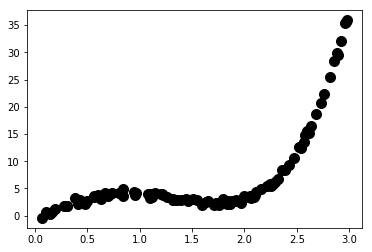

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [3]:
x=np.vstack(x)

# k-fold

In [4]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.get_n_splits(x)

3

In [5]:
scores = list()
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scores.append(model2.fit(X_train, y_train).score(X_test, y_test))
    print(model2.fit(X_train, y_train).score(X_test, y_test))
print(scores)

0.81158140385
0.826283562532
0.663541058856
[0.81158140384950217, 0.82628356253184154, 0.66354105885551051]


In [6]:
kfold = KFold(n_splits=3)
[model2.fit(x[train], y[train]).score(x[test], y[test]) for train, test in kfold.split(x)]

[0.81158140384950217, 0.82628356253184154, 0.66354105885551051]

# cross_val_score
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, x, y, cv=kfold)

array([ 0.8115814 ,  0.82628356,  0.66354106])

In [8]:
cross_val_score(model2, x, y, cv=kfold, scoring='r2')

array([ 0.8115814 ,  0.82628356,  0.66354106])

In [9]:
cross_val_score(model2, x, y, cv=kfold, scoring='neg_median_absolute_error')

array([-3.63541526, -2.80894023, -3.03593995])

# cross_val_predict

In [10]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model2, x, y, cv=kfold)

array([  0.45048631,  10.94025335,   6.06499167,   5.85086085,
        21.79908659,  17.16108119,  25.72910039,  11.47859196,
         0.46925661,   0.2269473 ,   9.57481118,   0.21169912,
         0.33315399,   7.35025572,   4.42686497,  10.15433259,
         3.39195848,   1.3413017 ,   0.83266332,   3.99984785,
         5.00938913,  25.68156635,   0.1784539 ,   8.66805824,
         5.49427424,  17.70798764,   2.97822189,  14.28168815,
         0.24254985,   7.22767381,   4.29786117,   3.29486262,
        22.8722502 ,   1.78038326,   4.53292065,  24.76019349,
        -0.44428906,  -0.46694125,  13.78783213,  27.19087416,
         0.11078971,   0.25877841,   4.3571289 ,   0.74399929,
         0.10266323,  16.83898623,   0.79346509,   7.45885941,
         1.17652637,  19.60652491,   2.25859135,  21.34384669,
        17.12837425,   0.19840399,   3.73032324,   3.39375608,
        -0.39276817,   2.14038988,  17.50094751,   6.88182067,
        10.38934784,  10.80388256,   0.11603233,  15.67

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich.
